In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:\Users\piaow\Desktop\database\Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',None)    # 显示所有列
data.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [4]:
#查看数据集中是否有重复值。
dupNum = data.shape[0] - data.drop_duplicates().shape[0]
print("数据集中有%s行重复值" % dupNum)

数据集中有0行重复值


In [5]:
#查看每一列是否有空值
data.isnull().any(axis=0)

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
# 查看TotalCharges的缺失值
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
#  执行coerce会将时间，bool，数字字符串转换为数字，不可转换的变为NaN
# apply()会将第二个参数，带入到第一个参数里（这里是pd.to_numeric函数）进行函数运算
# 例如def function(a,b):  
#      print(a,b)  
#  apply(function,('good','better'))  
#  apply(function,(2,3+6))  
#  apply(function,('cai','quan')) 
#  输出结果
# ('good', 'better')
# (2, 9)
# ('cai', 'quan')

# pd.to_numeric函数 转换之后默认float64类型
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce') 

print("此时TotalCharges是否已经转换为浮点型：", data['TotalCharges'].dtype == 'float')
print("此时TotalCharges存在%s行缺失样本。" % data['TotalCharges'].isnull().sum())

此时TotalCharges是否已经转换为浮点型： True
此时TotalCharges存在11行缺失样本。


In [8]:
# 固定值填充
# to_frame() 函数可以将数组转换成DataFrame的格式 ，后面用来查找空值比较方便
fnDf = data['TotalCharges'].fillna(0).to_frame()
print("如果采用固定值填充方法还存在%s行缺失样本。" % fnDf['TotalCharges'].isnull().sum())

如果采用固定值填充方法还存在0行缺失样本。


In [9]:
# 用MonthlyCharges的数值填充TotalCharges的缺失值
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'])    
# 查看那些入月网数为0的客户，那么他的总费用就是月费用
data[data['tenure'] == 0][['MonthlyCharges', 'TotalCharges']]    # 观察处理后缺失值变化情况

,MonthlyCharges,TotalCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35
4380,20.00,20.00
5218,19.70,19.70
6670,73.35,73.35


In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


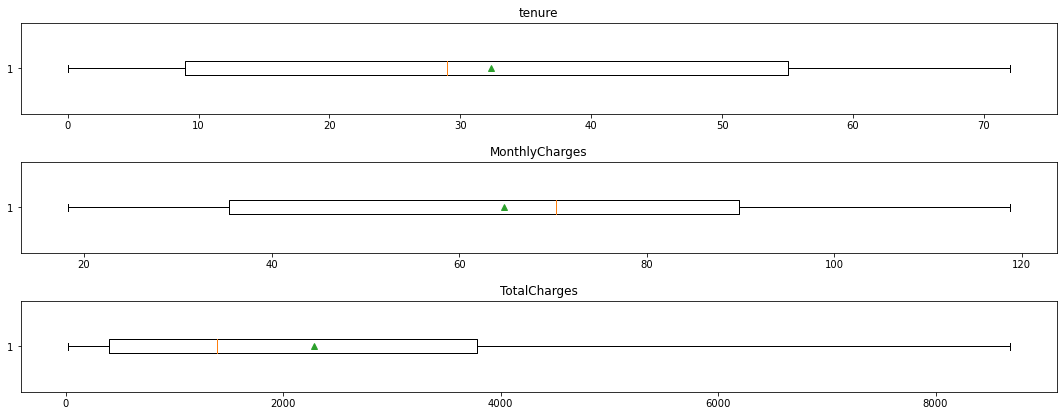

In [11]:
# 箱型图观察异常值情况
import seaborn as sns
import matplotlib.pyplot as plt    # 可视化
# 在Jupyter notebook里嵌入图片
%matplotlib inline

# 分析百分比特征
fig = plt.figure(figsize=(15,6)) # 建立图像

# tenure特征
ax1 = fig.add_subplot(311)    # 子图1
list1 = list(data['tenure'])
ax1.boxplot(list1, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax1.set_title('tenure')

# MonthlyCharges特征
ax2 = fig.add_subplot(312)    # 子图2
list2 = list(data['MonthlyCharges'])
ax2.boxplot(list2, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax2.set_title('MonthlyCharges')

# TotalCharges
ax3 = fig.add_subplot(313)    # 子图3
list3 = list(data['TotalCharges'])
ax3.boxplot(list3, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax3.set_title('TotalCharges')

plt.tight_layout(pad=1.5)    # 设置子图之间的间距
plt.show() # 展示箱型图

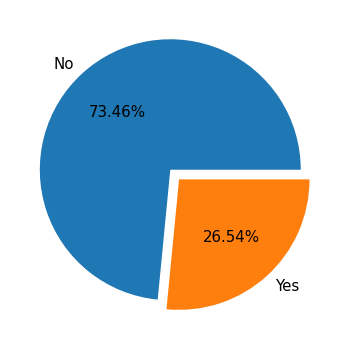

In [12]:
# 观察是否存在类别不平衡现象
p = data['Churn'].value_counts()    # 目标变量正负样本的分布

plt.figure(figsize=(10,6))    # 构建图像

# 绘制饼图并调整字体大小
patches, l_text, p_text = plt.pie(p,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
# l_text是饼图对着文字大小，p_text是饼图内文字大小
for t in p_text:
    t.set_size(15)
for t in l_text:
    t.set_size(15)
    
plt.show()    # 展示图像

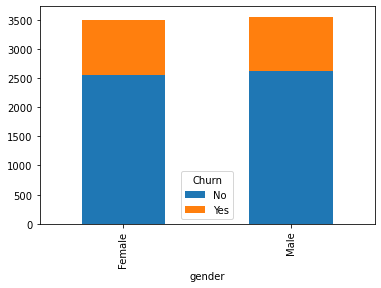

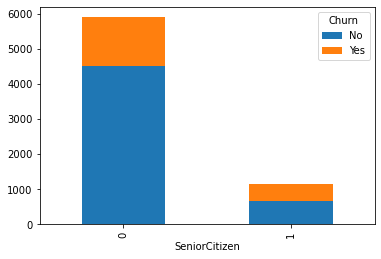

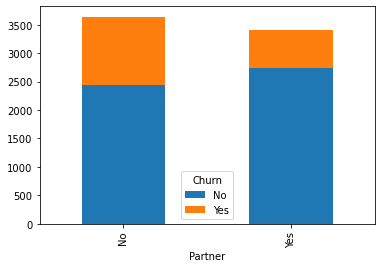

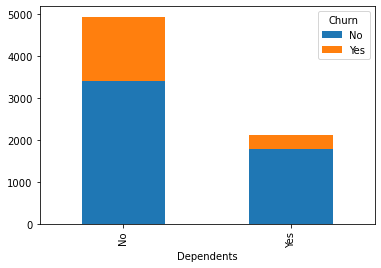

In [13]:
### 性别、是否老年人、是否有配偶、是否有家属等特征对客户流失的影响
baseCols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i in baseCols:
    cnt = pd.crosstab(data[i], data['Churn'])    # 构建特征与目标变量的列联表
    cnt.plot.bar(stacked=True)    # 绘制堆叠条形图，便于观察不同特征值流失的占比情况
    plt.show()    # 展示图像

C:\Users\piaow\AppData\Local\Temp\ipykernel_11696\201140973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupDf['Churn'] = groupDf['Churn'].map({'Yes': 1, 'No': 0})    # 将正负样本目标变量改为1和0方便计算


    tenure     Churn
0        0  0.000000
1        1  0.619902
2        2  0.516807
3        3  0.470000
4        4  0.471591
..     ...       ...
68      68  0.090000
69      69  0.084211
70      70  0.092437
71      71  0.035294
72      72  0.016575

[73 rows x 2 columns]


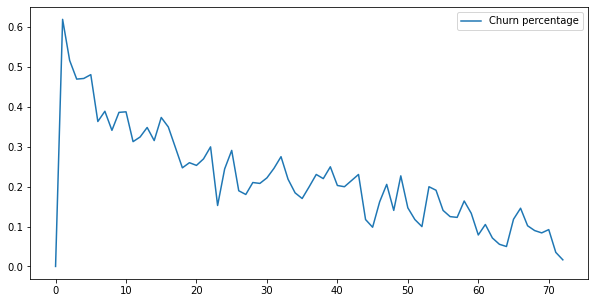

In [14]:
### 观察流失率与入网月数的关系
# 折线图
groupDf = data[['tenure', 'Churn']]    # 只需要用到两列数据
groupDf['Churn'] = groupDf['Churn'].map({'Yes': 1, 'No': 0})    # 将正负样本目标变量改为1和0方便计算
pctDf = groupDf.groupby(['tenure']).sum() / groupDf.groupby(['tenure']).count()    # 计算不同入网月数对应的流失率
pctDf = pctDf.reset_index()    # 将索引变成列

print(pctDf)

plt.figure(figsize=(10, 5))
plt.plot(pctDf['tenure'], pctDf['Churn'], label='Churn percentage')    # 绘制折线图
plt.legend()    # 显示图例
plt.show()

In [15]:
pctDf.head()

,tenure,Churn
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591


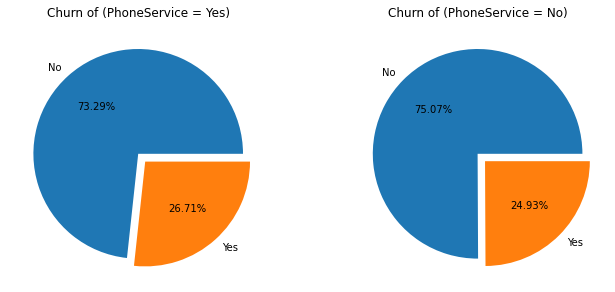

In [16]:
# 电话业务
posDf = data[data['PhoneService'] == 'Yes']
negDf = data[data['PhoneService'] == 'No']

fig = plt.figure(figsize=(10,4)) # 建立图像

ax1 = fig.add_subplot(121)
p1 = posDf['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PhoneService = Yes)')

ax2 = fig.add_subplot(122)
p2 = negDf['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PhoneService = No)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

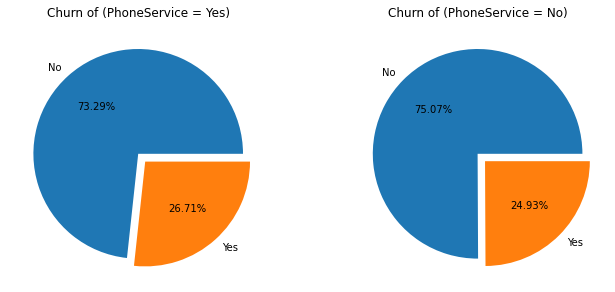

In [17]:
# 电话业务
posDf = data[data['PhoneService'] == 'Yes']
negDf = data[data['PhoneService'] == 'No']

fig = plt.figure(figsize=(10,4)) # 建立图像

ax1 = fig.add_subplot(121)
p1 = posDf['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PhoneService = Yes)')

ax2 = fig.add_subplot(122)
p2 = negDf['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PhoneService = No)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

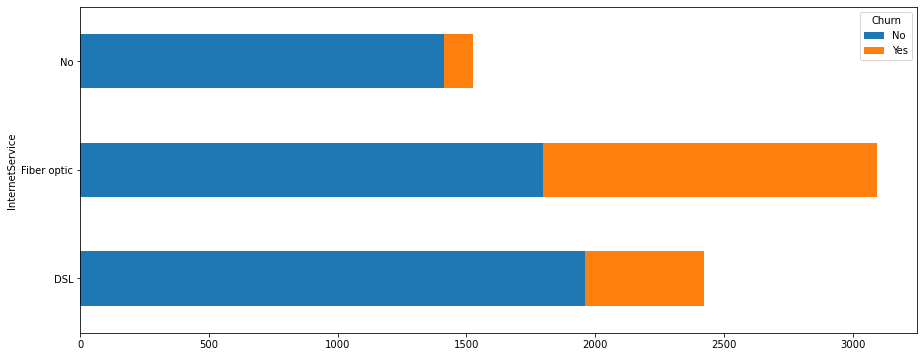

In [18]:
# 互联网业务
cnt = pd.crosstab(data['InternetService'], data['Churn'])    # 构建特征与目标变量的列联表
cnt.plot.barh(stacked=True, figsize=(15,6))    # 绘制堆叠条形图，便于观察不同特征值流失的占比情况
plt.show()    # 展示图像

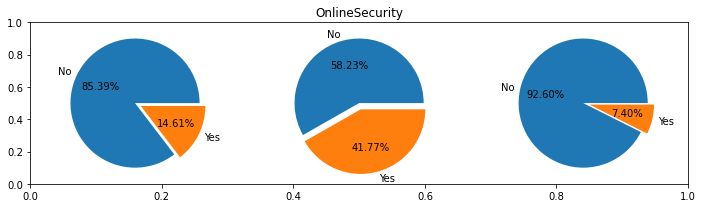

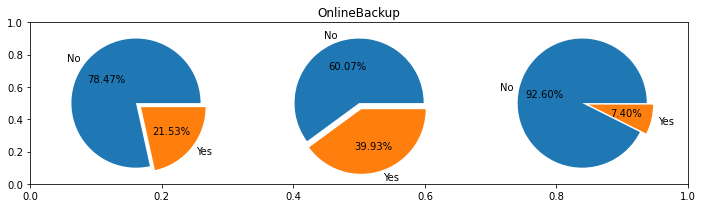

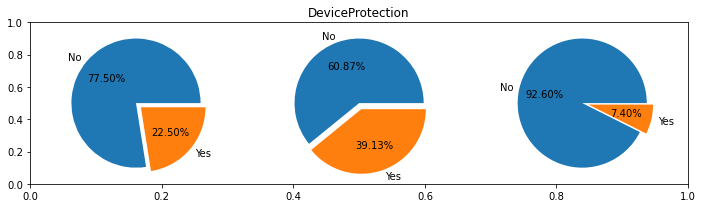

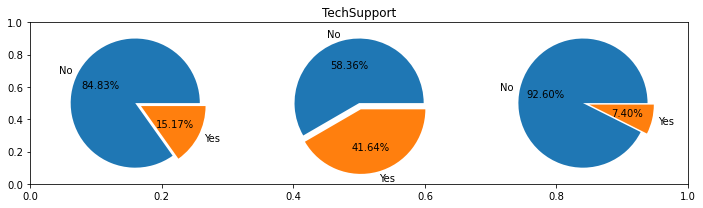

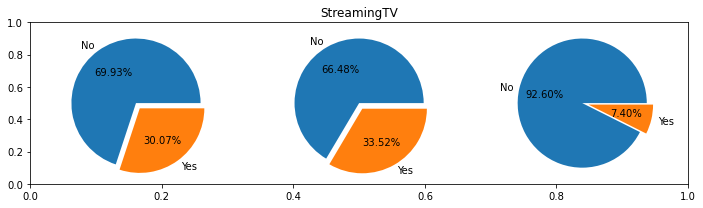

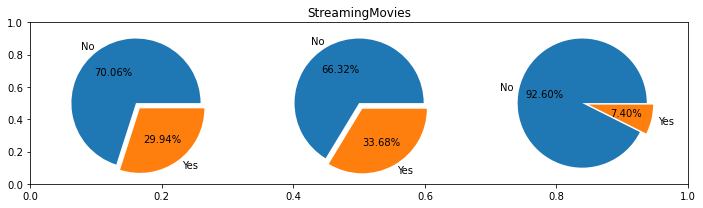

In [19]:
# 与互联网相关的业务
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in internetCols:
    df1 = data[data[i] == 'Yes']
    df2 = data[data[i] == 'No']
    df3 = data[data[i] == 'No internet service']

    fig = plt.figure(figsize=(10,3)) # 建立图像
    plt.title(i)
    
    ax1 = fig.add_subplot(131)
    p1 = df1['Churn'].value_counts()
    ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 开通业务

    ax2 = fig.add_subplot(132)
    p2 = df2['Churn'].value_counts()
    ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 未开通业务

    ax3 = fig.add_subplot(133)
    p3 = df3['Churn'].value_counts()
    ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    # 未开通互联网业务
  
    plt.tight_layout()    # 设置子图之间的间距
    plt.show() # 展示饼状图

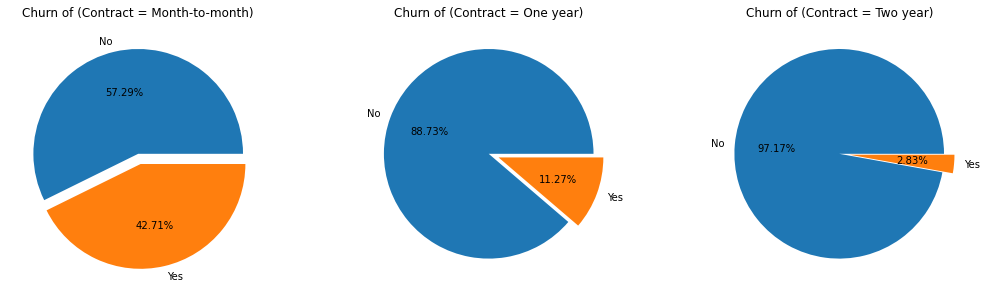

In [20]:
# 合约期限
df1 = data[data['Contract'] == 'Month-to-month']
df2 = data[data['Contract'] == 'One year']
df3 = data[data['Contract'] == 'Two year']

fig = plt.figure(figsize=(15,4)) # 建立图像

ax1 = fig.add_subplot(131)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (Contract = Month-to-month)')

ax2 = fig.add_subplot(132)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (Contract = One year)')

ax3 = fig.add_subplot(133)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (Contract = Two year)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

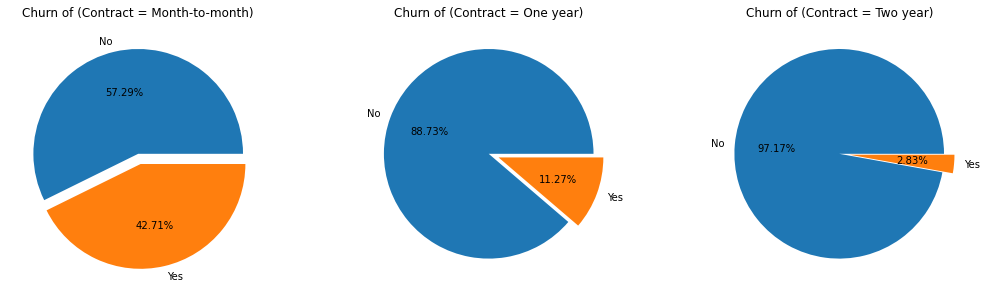

In [21]:
# 合约期限
df1 = data[data['Contract'] == 'Month-to-month']
df2 = data[data['Contract'] == 'One year']
df3 = data[data['Contract'] == 'Two year']

fig = plt.figure(figsize=(15,4)) # 建立图像

ax1 = fig.add_subplot(131)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (Contract = Month-to-month)')

ax2 = fig.add_subplot(132)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (Contract = One year)')

ax3 = fig.add_subplot(133)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (Contract = Two year)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

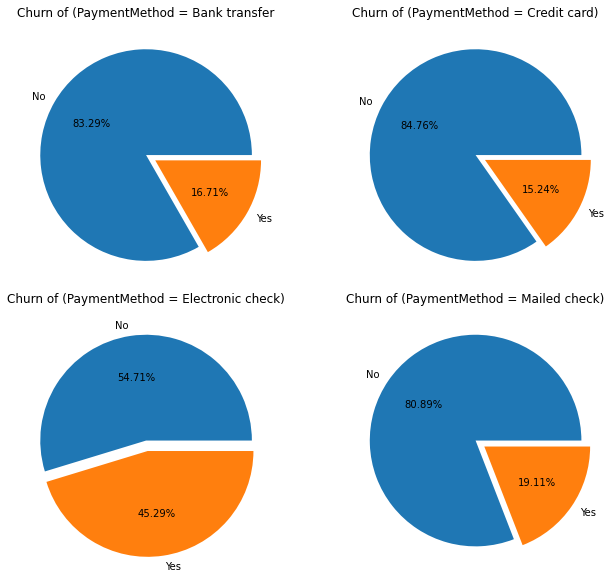

In [22]:
# 付款方式
df1 = data[data['PaymentMethod'] == 'Bank transfer (automatic)']    # 银行转账（自动）
df2 = data[data['PaymentMethod'] == 'Credit card (automatic)']    # 信用卡（自动）
df3 = data[data['PaymentMethod'] == 'Electronic check']    # 电子支票
df4 = data[data['PaymentMethod'] == 'Mailed check']    # 邮寄支票

fig = plt.figure(figsize=(10,8)) # 建立图像

ax1 = fig.add_subplot(221)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PaymentMethod = Bank transfer')

ax2 = fig.add_subplot(222)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PaymentMethod = Credit card)')

ax3 = fig.add_subplot(223)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (PaymentMethod = Electronic check)')

ax4 = fig.add_subplot(224)
p4 = df4['Churn'].value_counts()
ax4.pie(p4,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax4.set_title('Churn of (PaymentMethod = Mailed check)')

plt.tight_layout(pad=0.5)    # 设置子图之间的间距
plt.show() # 展示饼状图

F:\anaconda\anaconda-apilcation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\anaconda\anaconda-apilcation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


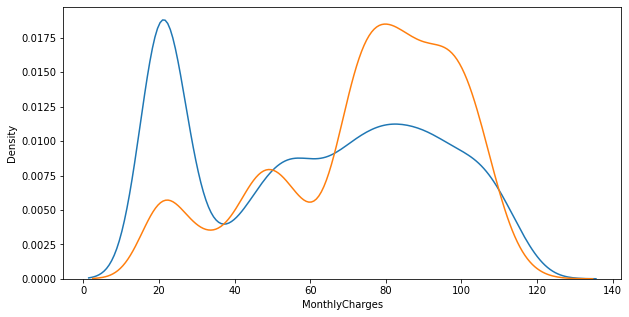

In [23]:
# 每月费用核密度估计图
plt.figure(figsize=(10, 5))    # 构建图像

negDf = data[data['Churn'] == 'No']
sns.distplot(negDf['MonthlyCharges'], hist=False, label= 'No')
posDf = data[data['Churn'] == 'Yes']
sns.distplot(posDf['MonthlyCharges'], hist=False, label= 'Yes')

plt.show()    # 展示图像

F:\anaconda\anaconda-apilcation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
F:\anaconda\anaconda-apilcation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


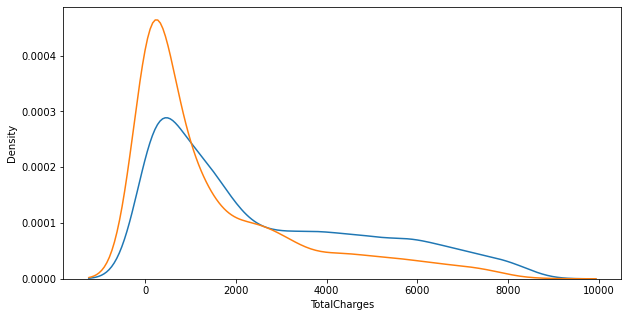

In [24]:
# 总费用核密度估计图
plt.figure(figsize=(10, 5))    # 构建图像

negDf = data[data['Churn'] == 'No']
sns.distplot(negDf['TotalCharges'], hist=False, label= 'No')
posDf = data[data['Churn'] == 'Yes']
sns.distplot(posDf['TotalCharges'], hist=False, label= 'Yes')

plt.show()    # 展示图像

In [25]:
### 数值特征标准化
from sklearn.preprocessing import StandardScaler    # 导入标准化库

'''
注：

新版本的sklearn库要求输入数据是二维的，而例如data['tenure']这样的Series格式本质上是一维的
如果直接进行标准化，可能报错 "ValueError: Expected 2D array, got 1D array instead"
解决方法是变一维的Series为二维的DataFrame，即多加一组[]，例如data[['tenure']]
'''
scaler = StandardScaler()
data[['tenure']] = scaler.fit_transform(data[['tenure']])
data[['MonthlyCharges']] = scaler.fit_transform(data[['MonthlyCharges']])
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']])

data[['tenure', 'MonthlyCharges', 'TotalCharges']].head()    # 观察此时的数值特征

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992667
1,0.066327,-0.259629,-0.172198
2,-1.236724,-0.362660,-0.958122
3,0.514251,-0.746535,-0.193706
4,-1.236724,0.197365,-0.938930


In [26]:
### 数值特征标准化
from sklearn.preprocessing import StandardScaler    # 导入标准化库

'''
注：

新版本的sklearn库要求输入数据是二维的，而例如data['tenure']这样的Series格式本质上是一维的
如果直接进行标准化，可能报错 "ValueError: Expected 2D array, got 1D array instead"
解决方法是变一维的Series为二维的DataFrame，即多加一组[]，例如data[['tenure']]
'''
scaler = StandardScaler()
data[['tenure']] = scaler.fit_transform(data[['tenure']])
data[['MonthlyCharges']] = scaler.fit_transform(data[['MonthlyCharges']])
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']])

data[['tenure', 'MonthlyCharges', 'TotalCharges']].head()    # 观察此时的数值特征

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992667
1,0.066327,-0.259629,-0.172198
2,-1.236724,-0.362660,-0.958122
3,0.514251,-0.746535,-0.193706
4,-1.236724,0.197365,-0.938930


In [27]:
### 类别特征编码
# 首先将部分特征值进行合并
data.loc[data['MultipleLines']=='No phone service', 'MultipleLines'] = 'No'

internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    data.loc[data[i]=='No internet service', i] = 'No'

print("MultipleLines特征还有%d条样本的值为 'No phone service'" % data[data['MultipleLines']=='No phone service'].shape[0])
print("OnlineSecurity特征还有%d条样本的值为 'No internet service'" % data[data['OnlineSecurity']=='No internet service'].shape[0])
print("...")

MultipleLines特征还有0条样本的值为 'No phone service'
OnlineSecurity特征还有0条样本的值为 'No internet service'
...


In [28]:
# 部分类别特征只有两类取值，可以直接用0、1代替；另外，可视化过程中发现有四列特征对结果影响可以忽略，后续直接删除
# 选择特征值为‘Yes’和 'No' 的列名
encodeCols = list(data.columns[3: 17].drop(['tenure', 'PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract']))     


In [29]:
for i in encodeCols:
    data[i] = data[i].map({'Yes': 1, 'No': 0})    # 用1代替'Yes’，0代替 'No'
# 顺便把目标变量也进行编码    
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [30]:
# 其他无序的类别特征采用独热编码    
onehotCols = ['InternetService', 'Contract', 'PaymentMethod']
churnDf = data['Churn'].to_frame()    # 取出目标变量列，以便后续进行合并
featureDf = data.drop(['Churn'], axis=1)    # 所有特征列

for i in onehotCols:
    onehotDf = pd.get_dummies(featureDf[i],prefix=i) 
    featureDf = pd.concat([featureDf, onehotDf],axis=1)    # 编码后特征拼接到去除目标变量的数据集中

data = pd.concat([featureDf, churnDf],axis=1)    # 拼回目标变量，确保目标变量在最后一列
data = data.drop(onehotCols, axis=1)    # 删除原特征列

In [31]:
# 删去无用特征 'customerID'、'gender'、 'PhoneService'、'StreamingTV'和'StreamingMovies'
data = data.drop(['customerID', 'gender', 'PhoneService', 'StreamingTV', 'StreamingMovies'], axis=1)  

In [32]:
data.head(10)    # 观察此时的数据集

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,-1.277445,0,0,1,0,0,1,-1.160323,-0.992667,1,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.066327,0,1,0,1,0,0,-0.259629,-0.172198,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,-1.236724,0,1,1,0,0,1,-0.362660,-0.958122,1,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0.514251,0,1,0,1,1,0,-0.746535,-0.193706,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,-1.236724,0,0,0,0,0,1,0.197365,-0.938930,0,1,0,1,0,0,0,0,1,0,1
5,0,0,0,-0.992402,1,0,0,1,0,1,1.159546,-0.643836,0,1,0,1,0,0,0,0,1,0,1
6,0,0,1,-0.422317,1,0,1,0,0,1,0.808907,-0.145771,0,1,0,1,0,0,0,1,0,0,0
7,0,0,0,-0.910961,0,1,0,0,0,0,-1.163647,-0.872640,1,0,0,1,0,0,0,0,0,1,0
8,0,1,0,-0.177995,1,0,0,1,1,1,1.330711,0.338066,0,1,0,1,0,0,0,0,1,0,1
9,0,0,1,1.206498,0,1,1,0,0,0,-0.286218,0.533031,1,0,0,0,1,0,1,0,0,0,0


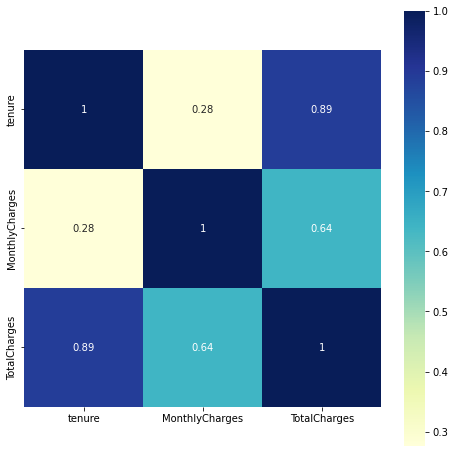

In [33]:
nu_fea = data[['tenure', 'MonthlyCharges', 'TotalCharges']]    # 选择连续型数值特征计算相关系数
nu_fea = list(nu_fea)    # 特征名列表
pearson_mat = data[nu_fea].corr(method='spearman')    # 计算皮尔逊相关系数矩阵

plt.figure(figsize=(8,8)) # 建立图像
sns.heatmap(pearson_mat, square=True, annot=True, cmap="YlGnBu")    # 用热度图表示相关系数矩阵
plt.show() # 展示热度图

In [34]:
data = data.drop(['TotalCharges'],axis=1)
data.head(10) #观察此时的数据集

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,-1.277445,0,0,1,0,0,1,-1.160323,1,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.066327,0,1,0,1,0,0,-0.259629,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,-1.236724,0,1,1,0,0,1,-0.362660,1,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0.514251,0,1,0,1,1,0,-0.746535,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,-1.236724,0,0,0,0,0,1,0.197365,0,1,0,1,0,0,0,0,1,0,1
5,0,0,0,-0.992402,1,0,0,1,0,1,1.159546,0,1,0,1,0,0,0,0,1,0,1
6,0,0,1,-0.422317,1,0,1,0,0,1,0.808907,0,1,0,1,0,0,0,1,0,0,0
7,0,0,0,-0.910961,0,1,0,0,0,0,-1.163647,1,0,0,1,0,0,0,0,0,1,0
8,0,1,0,-0.177995,1,0,0,1,1,1,1.330711,0,1,0,1,0,0,0,0,1,0,1
9,0,0,1,1.206498,0,1,1,0,0,0,-0.286218,1,0,0,0,1,0,1,0,0,0,0


In [35]:
# SMOTE方法代码如下（代码来自博客 https://blog.csdn.net/Yaphat/article/details/52463304）
import random
from sklearn.neighbors import NearestNeighbors    # k近邻算法
import numpy as np
class Smote:
    def __init__(self,samples,N,k):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0

    def over_sampling(self):
        N=int(self.N)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)    # 1.对每个少数类样本均求其在所有少数类样本中的k近邻
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            self._populate(N,i,nnarray)
        return self.synthetic

    # 2.为每个少数类样本选择k个最近邻中的N个；3.并生成N个合成样本
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1

In [36]:
# 每个正样本用SMOTE方法随机生成两个新的样本
posDf = data[data['Churn'] == 1].drop(['Churn'], axis=1)    # 共1869条正样本, 取其所有特征列


In [37]:
posDf.values

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [38]:
posArray = posDf.values    # pd.DataFrame -> np.array, 以满足SMOTE方法的输入要求


In [39]:
posArray

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [40]:
newPosArray = Smote(posArray,N=2,k=5).over_sampling()


In [41]:
newPosArray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.01380158, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [42]:
newPosDf = pd.DataFrame(newPosArray)    # np.array -> pd.DataFrame

newPosDf.head(10)    # 观察此时的新样本 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,-1.211626,0.0,1.0,1.0,0.0,0.0,1.0,-0.739591,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,-1.222702,0.0,1.0,1.0,0.0,0.0,1.0,-0.573250,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,-1.254298,0.0,0.0,0.0,0.0,0.0,1.0,0.195931,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,-1.263584,0.0,0.0,0.0,0.0,0.0,1.0,0.188596,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,-0.986062,1.0,0.0,0.0,1.0,0.0,1.0,1.161443,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,-1.004652,1.0,0.0,0.0,1.0,0.0,1.0,1.162145,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.178681,1.0,0.0,0.0,1.0,1.0,1.0,1.336533,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.193046,1.0,0.0,0.0,1.0,1.0,1.0,0.887261,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.388255,1.0,0.0,1.0,1.0,0.0,1.0,1.258784,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.590422,1.0,0.0,1.0,1.0,0.0,1.0,1.283535,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
# 调整为正样本在数据集中应有的格式
newPosDf.columns = posDf.columns    # 还原特征名
cateCols = list(newPosDf.columns.drop(['tenure', 'MonthlyCharges']))   # 提取离散特征名组成的列表
for i in cateCols:
    newPosDf[i] = newPosDf[i].apply(lambda x: 1 if x >= 0.5 else 0)    # 将特征值变回0、1二元数值
newPosDf['Churn'] = 1    # 添加目标变量列

newPosDf.head(10)    # 观察此时的新样本

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,0,-1.211626,0,1,1,0,0,1,-0.739591,1,0,0,1,0,0,0,0,0,1,1
1,0,0,0,-1.222702,0,1,1,0,0,1,-0.573250,1,0,0,1,0,0,0,0,0,1,1
2,0,0,0,-1.254298,0,0,0,0,0,1,0.195931,0,1,0,1,0,0,0,0,1,0,1
3,0,0,0,-1.263584,0,0,0,0,0,1,0.188596,0,1,0,1,0,0,0,0,1,0,1
4,0,0,0,-0.986062,1,0,0,1,0,1,1.161443,0,1,0,1,0,0,0,0,1,0,1
5,0,0,0,-1.004652,1,0,0,1,0,1,1.162145,0,1,0,1,0,0,0,0,1,0,1
6,0,1,0,0.178681,1,0,0,1,1,1,1.336533,0,1,0,1,0,0,0,0,1,0,1
7,0,1,0,0.193046,1,0,0,1,1,1,0.887261,0,1,0,1,0,0,0,0,1,0,1
8,0,0,0,0.388255,1,0,1,1,0,1,1.258784,0,1,0,1,0,0,1,0,0,0,1
9,0,0,0,0.590422,1,0,1,1,0,1,1.283535,0,1,0,1,0,0,1,0,0,0,1


In [44]:
print("原来的正样本有%d条" % posDf.shape[0])
print("原来的负样本有%d条" % (data.shape[0] - posDf.shape[0]))

原来的正样本有1869条
原来的负样本有5174条


In [45]:
# 构建类别平衡的数据集
from sklearn.utils import shuffle    

newPosDf = newPosDf[:3305]    # 直接选取前3305条样本
data = pd.concat([data, newPosDf])    # 竖向拼接
# data = shuffle(data).reset_index(drop=True)

print("此时数据集的规模为：", data.shape)

此时数据集的规模为： (10348, 22)


In [46]:
# K折交叉验证代码
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold

def kFold_cv(X, y, classifier, **kwargs):
    """
    :param X: 特征
    :param y: 目标变量
    :param classifier: 分类器
    :param **kwargs: 参数
    :return: 预测结果
    """
    kf = KFold(n_splits=5, shuffle=True) 
    y_pred = np.zeros(len(y))    # 初始化y_pred数组
    print(kf.split(X))
    for train_index, test_index in kf.split(X):  
        X_train = X[train_index]    
        X_test = X[test_index]
        y_train = y[train_index]    # 划分数据集

        clf = classifier()    
        clf.fit(X_train, y_train)    # 模型训练
        y_pred[test_index] = clf.predict(X_test)    # 模型预测
    
    return y_pred

In [47]:
# 模型预测
from sklearn.linear_model import LogisticRegression as LR    # 逻辑回归
# from sklearn.svm import SVC    # SVM
from sklearn.ensemble import RandomForestClassifier as RF    # 随机森林
from sklearn.ensemble import AdaBoostClassifier as Adaboost    # AdaBoost
from xgboost import XGBClassifier as XGB    # XGBoost

# X = data.iloc[:, :-1].as_matrix()
X = data.iloc[:, :-1].iloc[:,:].values # Kagging
y = data.iloc[:, -1].values
print(X)
# 此处仅做演示，因此未进行调参过程
lr_pred = kFold_cv(X, y, LR)
rf_pred = kFold_cv(X, y, RF)
ada_pred = kFold_cv(X, y, Adaboost)
xgb_pred = kFold_cv(X, y, XGB)

[[0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
<generator object _BaseKFold.split at 0x0000024EE568EF90>
<generator object _BaseKFold.split at 0x0000024EE568EF90>
<generator object _BaseKFold.split at 0x0000024EE568EF90>
<generator object _BaseKFold.split at 0x0000024EE584F3C0>


In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score    # 导入精确率、召回率、F1值等评价指标

scoreDf = pd.DataFrame(columns=['LR', 'RandomForest', 'AdaBoost', 'XGBoost'])
pred = [lr_pred, rf_pred, ada_pred, xgb_pred]
for i in range(4):
    r = recall_score(y, pred[i])
    p = precision_score(y, pred[i])
    f1 = f1_score(y, pred[i])
    scoreDf.iloc[:, i] = pd.Series([r, p, f1])

scoreDf.index = ['Recall', 'Precision', 'F1-score']
scoreDf

,LR,RandomForest,AdaBoost,XGBoost
Recall,0.798415,0.906262,0.820835,0.851372
Precision,0.749864,0.831236,0.749294,0.810338
F1-score,0.773378,0.867129,0.783435,0.830349


In [49]:
# 特征重要性
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

kf = KFold(n_splits=5, shuffle=True, random_state=0)
y_pred = np.zeros(len(y))    # 初始化y_pred数组
clf = RF()

for train_index, test_index in kf.split(X):
    X_train = X[train_index]    
    X_test = X[test_index]
    y_train = y[train_index]    # 划分数据集
    clf.fit(X_train, y_train)    # 模型训练
    y_pred[test_index] = clf.predict(X_test)    # 模型预测
    
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = data.columns.drop(['Churn']),
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances    # 查看特征重要性

,importance
MonthlyCharges,0.244403
tenure,0.241121
Contract_Month-to-month,0.088710
Contract_Two year,0.052160
InternetService_Fiber optic,0.043371
PaperlessBilling,0.029106
Partner,0.025972
TechSupport,0.025197
OnlineSecurity,0.024902
PaymentMethod_Electronic check,0.024763


In [58]:
# 预测客户流失的概率值
def prob_cv(X, y, classifier, **kwargs):
    """
    :param X: 特征
    :param y: 目标变量
    :param classifier: 分类器
    :param **kwargs: 参数
    :return: 预测结果
    """
    kf = KFold(n_splits=5,shuffle=True, random_state=0)
    y_pred = np.zeros(len(y))    
    
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]    
        X_test = X[test_index]
        y_train = y[train_index]    
        clf = classifier(**kwargs)    
        clf.fit(X_train, y_train)    
        y_pred[test_index] = clf.predict_proba(X_test)[:,1]    # 注：此处预测的是概率值
    
    return y_pred

In [59]:
prob = prob_cv(X, y, RF)    # 预测概率值


In [60]:
prob = np.round(prob, 1)    # 对预测出的概率值保留一位小数，便于分组观察

# 合并预测值和真实值
probDf = pd.DataFrame(prob)
churnDf = pd.DataFrame(y)
df1 = pd.concat([probDf, churnDf], axis=1)
df1.columns = ['prob', 'churn']

df1 = df1[:7043]    # 只取原始数据集的7043条样本进行决策
df1.head(10)

,prob,churn
0,0.7,0
1,0.1,0
2,0.9,1
3,0.1,0
4,0.7,1
5,1.0,1
6,0.6,0
7,0.3,0
8,1.0,1
9,0.0,0


In [103]:
# 分组计算每种预测概率值所对应的真实流失率
group = df1.groupby(['prob'])
cnt = group.count()    # 每种概率值对应的样本数
true_prob = group.sum() / group.count()    # 真实流失率
df2 = pd.concat([cnt,true_prob], axis=1).reset_index()
df2.columns = ['prob', 'cnt', 'true_prob']

df2

,prob,cnt,true_prob
0,0.0,1685,0.008309
1,0.1,781,0.032010
2,0.2,742,0.059299
3,0.3,515,0.099029
4,0.4,517,0.137331
5,0.5,360,0.227778
6,0.6,431,0.396752
7,0.7,369,0.479675
8,0.8,549,0.650273
9,0.9,539,0.751391
